   AtBat  Hits  HmRun  Runs  RBI  Walks  Years  CAtBat  CHits  CHmRun  CRuns  \
0    293    66      1    30   29     14      1     293     66       1     30   
1    315    81      7    24   38     39     14    3449    835      69    321   
2    479   130     18    66   72     76      3    1624    457      63    224   
3    496   141     20    65   78     37     11    5628   1575     225    828   
4    321    87     10    39   42     30      2     396    101      12     48   

   CRBI  CWalks League Division  PutOuts  Assists  Errors  Salary NewLeague  
0    29      14      A        E      446       33      20     NaN         A  
1   414     375      N        W      632       43      10   475.0         N  
2   266     263      A        W      880       82      14   480.0         A  
3   838     354      N        E      200       11       3   500.0         N  
4    46      33      N        E      805       40       4    91.5         N  
Columns in the dataset: Index(['AtBat', 'Hits', 'Hm

c:\Users\surva\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\cluster\_agglomerative.py:1006: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


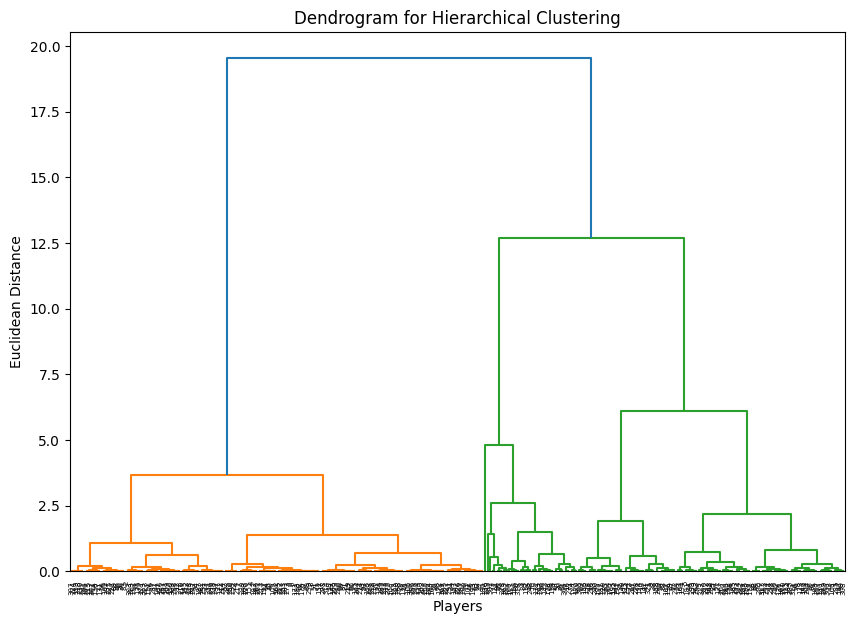

Cluster assignments:
   AtBat  CRuns  Cluster
0    293     30        1
1    315    321        0
2    479    224        1
3    496    828        2
4    321     48        1


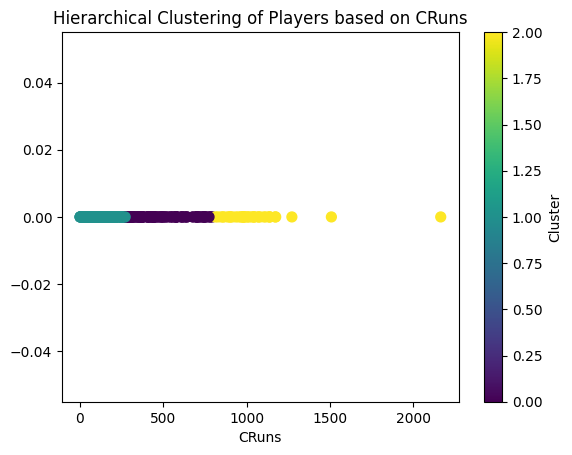

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch

# Step 1: Load the dataset
data = pd.read_csv('hitters.csv')

# Step 2: Inspect the first few rows to understand the structure
print(data.head())

# Check the column names to find out if there's a 'Name' column
print("Columns in the dataset:", data.columns)

# Step 3: Data Preprocessing

# Check for missing values and handle them
# For simplicity, let's drop rows with missing values (you could also impute missing values if necessary)
data = data.dropna(subset=['CRuns'])

# If there are categorical columns (e.g., 'League', 'Division', 'NewLeague'), we apply Label Encoding
# Let's encode categorical columns if they exist
categorical_columns = ['League', 'Division', 'NewLeague']  # Adjust this list if other categorical columns exist
for col in categorical_columns:
    if col in data.columns:
        label_encoder = LabelEncoder()
        data[col] = label_encoder.fit_transform(data[col])

# Step 4: Feature Selection
# We focus on the 'CRuns' column for clustering
X = data[['CRuns']]

# Step 5: Feature Scaling (standardize the data)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 6: Apply Hierarchical Clustering
# Using Agglomerative Hierarchical Clustering to form 3 clusters (you can adjust the number of clusters)
hc = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')

# Fit the model to the scaled data
data['Cluster'] = hc.fit_predict(X_scaled)

# Step 7: Visualize the Dendrogram
plt.figure(figsize=(10, 7))
sch.dendrogram(sch.linkage(X_scaled, method='ward'))
plt.title('Dendrogram for Hierarchical Clustering')
plt.xlabel('Players')
plt.ylabel('Euclidean Distance')
plt.show()

# Step 8: Output the resulting clusters
# Since there is no 'Name' column, check the column that corresponds to the player names.
# For this example, let's assume the player names are in the 'AtBat' column (adjust based on your dataset).
# You can change it to any appropriate column if needed.
print("Cluster assignments:")
print(data[['AtBat', 'CRuns', 'Cluster']].head())  # Replace 'AtBat' with the correct player name column if available

# Optional: Visualize the clusters (if more features are used for clustering, scatter plot can be extended)
plt.scatter(data['CRuns'], np.zeros_like(data['CRuns']), c=data['Cluster'], cmap='viridis', s=50)
plt.colorbar(label='Cluster')
plt.xlabel('CRuns')
plt.title('Hierarchical Clustering of Players based on CRuns')
plt.show()
